## Phase 3 Final Project Submission

Please fill out:
* Student name: Shawn J Irungu
* Student pace: Full Time Hybrid
* Scheduled project review date/time: 
* Instructor name: Samuel Karu
* Blog post URL: 


### PROJECT OVERVIEW

Predicting water well failures is critical for sustainable water access. This project builds an ML classifier to assess well conditions (functional/repair-needed/non-functional) based on pump type, installation records, and location data, enabling proactive maintenance.

### BUSINESS UNDERSTANDING

Tanzania is a country in East Africa known for its national parks and wild animals. The World Bank estimates its population at 65 million as of 2022 and its land size is about 947,303 km2 (365,756 sq mi).

The country comprises many lakes, national parks, and in fact, Africa's highest point, Mount Kilimanjaro (5,895 m or 19,341 ft). Northeast Tanzania is mountainous, while the central area is part of a large plateau covered in grasslands.

However, like many other sub-Saharan African countries, Tanzania is a developing country struggling to provide adequate clean water for its bulging population that is growing at 3% per annum.

Extreme poverty rate was 44% in 2022 as the population continued to grow at 3% per year. This means an increasing population is not affording the basic quality of life.

##### GROUND WATER SITUATION IN TANZANIA

According to Dr. Japhet J. Kashaigili the hydrogeology of Tanzania has not been thoroughly studied and ground water development has concentrated mainly on shallow wells for domestic purposes over a wide part of the country. He also reports that up to 90% of pumps and other equipment used for water extraction fail due to a lack of repair and maintenance.

Various actors, such as the national and regional governments, religious organizations, and foreign cooperation agencies have established many water points around the country but they are hardly enough. What is worse is that a significant number of the water points are in need of repair while others have failed altogether

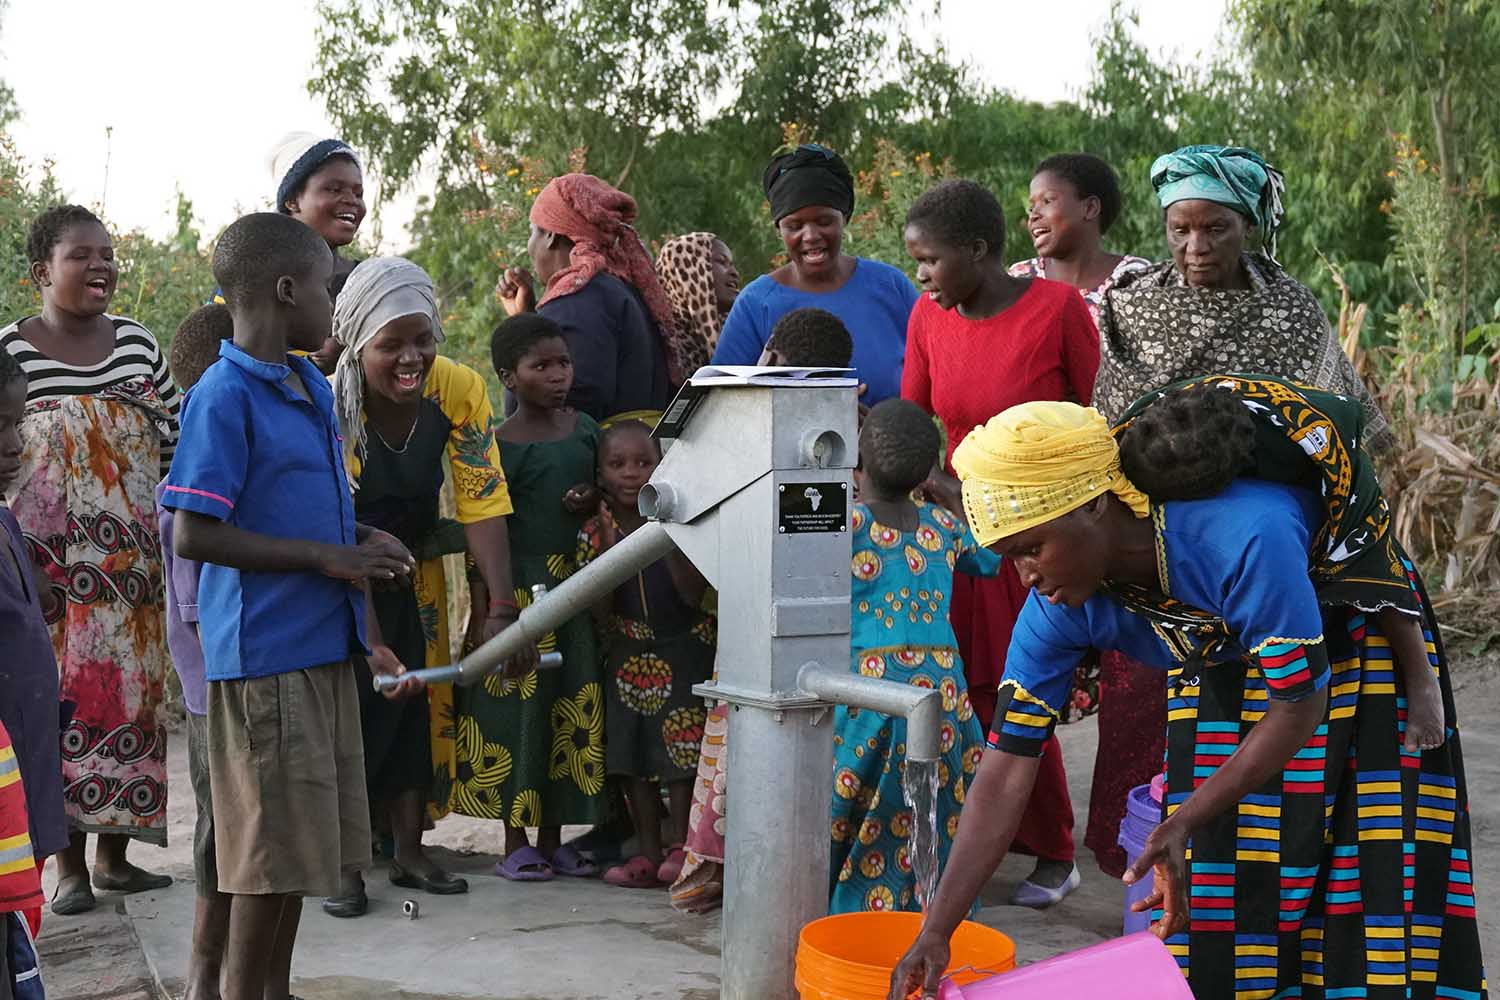

### BUSINESS PROBLEM

Climate change is exacerbating water scarcity in Tanzania, where extreme weather patterns—ranging from destructive rainfall to prolonged droughts—are disrupting water access. Despite these challenges, only 61% of Tanzanian households have access to basic water supply, while just 32% benefit from basic sanitation and 48% from basic hygiene (World Bank). Poor water infrastructure contributes to approximately 31,000 preventable deaths annually, imposing a heavy economic burden on the country.

The cost of water projects remains a critical barrier. A single hand-pump well, serving 600–700 people, requires an investment of $6,000–$8,000, while mechanized systems cost at least $12,000. Worse, up to 90% of water pumps fail prematurely due to inadequate maintenance, leaving communities without reliable access.

To address this crisis, Tanzania must prioritize sustainable installation practices and proactive maintenance of existing water systems. By leveraging data-driven solutions, we can optimize resource allocation and extend the lifespan of water infrastructure. 

I am committed to partnering with the Tanzanian government to tackle this challenge - ensuring clean, safe, and reliable water for millions.

### BUSINESS OBJECTIVE

My main objectives in this project will be:

> To build a Machine Learning classifier that will predict the condition of a water well (functional, functional-but-needs-repair, and non-functional), using data such as the kind of pump, when it was installed, the installer, the region, and so on.

> To help the Government of Tanzania find patterns in functional and non-functional wells, to help influence how new wells are built.

> To find the most important factors that influence whether a pump is functional, functional-but-needs-repair, or non-functional. This can guide the management of new and existing water wells.



#### STUDY QUESTIONS
1. Predictive Feasibility
"Can we accurately predict a water pump's operational status (functional, functional-but-needs-repair, or non-functional) using features such as pump type, installation date, installer, geographical region, and related variables?"

2. Key Influencing Factors
"Which 20 features have the strongest correlation with a pump's operational status? How do factors like pump model, maintenance history, or environmental conditions impact functionality?"

3. Geographical Trends
"How are functional, non-functional, and repair-needing pumps distributed across regions? Are there spatial patterns (e.g., clusters of non-functional pumps in arid areas)?"


### DATA UNDERSTANDING
The relevant datasets for have been provided on the Driven Data <https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/> website which is hosting a competition for this project. It consists of the following four datasets:

File............................................................Description

Submission format .............	The format for submitting model predictions

Test set values	The ............. independent variables that will be used to make predictions

Training set labels .............	The dependent variable (status_group) for each of the rows in training set values

Training set values ..............	The independent variables for the training set

.

.

.

For this phase 3 project am going to use the 3 files only. Will do away with the submission file since its showing us the way we should submit our predicted value to the hackathon program.

.

..

..



The labels in this dataset are simple. There are three possible values:

i.) functional - the waterpoint is operational and there are no repairs needed

ii.) functional needs repair - the waterpoint is operational, but needs repairs

iii.) non functional - the waterpoint is not operational


### IMPORTING NECESSARY LIBRARIES FOR THIS PROJECT

In [458]:
# Common Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from imblearn.over_sampling import SMOTE

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Scalers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelBinarizer


### DATA LOADING

In [380]:
# loading the datasets
# training set
train_values = pd.read_csv('data/train_values.csv')
train_target = pd.read_csv('data/training_set_label.csv')

# test set
test_values = pd.read_csv('data/test_values.csv')


In [381]:
# Merge the two dataframes (train) based the common index column 'id'
train = pd.merge(train_values, train_target, how = 'left', on='id')
train.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0     3/14/2011         Roman        1390         Roman   
1   8776         0.0      3/6/2013       Grumeti        1399       GRUMETI   
2  34310        25.0     2/25/2013  Lottery Club         686  World vision   
3  67743         0.0     1/28/2013        Unicef         263        UNICEF   
4  19728         0.0     7/13/2011   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none            0  ...          soft   
1  34.698766  -2.147466              Zahanati            0  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
4  31.130847  -1.825359               Shuleni            0  ...          soft   

  quality_group      quantity  quantity_group                source  \
0          good        enough          enough                spring   
1          good  insufficient    insufficient  rainwater harvesting   
2          good        enough          enough                   dam   
3          good           dry             dry           machine dbh   
4          good      seasonal        seasonal  rainwater harvesting   

            source_type source_class              waterpoint_type  \
0                spring  groundwater           communal standpipe   
1  rainwater harvesting      surface           communal standpipe   
2                   dam      surface  communal standpipe multiple   
3              borehole  groundwater  communal standpipe multiple   
4  rainwater harvesting      surface           communal standpipe   

  waterpoint_type_group    status_group  
0    communal standpipe      functional  
1    communal standpipe      functional  
2    communal standpipe      functional  
3    communal standpipe  non functional  
4    communal standpipe      functional  

[5 rows x 41 columns]

In [382]:
def dataframe_summary(df, name="Dataset"):
    """
    Print a comprehensive summary of a pandas DataFrame including:
    - Basic information
    - Descriptive statistics
    - Missing values analysis
    - Data types distribution
    
    
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze
    - name (str): Optional name for the dataset (for display purposes)
    """
    
    # Create a separator line for better readability
    separator = "=" * 70
    
    print(f"\n{separator}")
    print(f" COMPREHENSIVE SUMMARY FOR: {name.upper()}")
    print(f"{separator}\n")
    
    # 1. Basic Information Section
    print("🔍 BASIC INFORMATION")
    print(f"- Shape: {df.shape[0]} rows, {df.shape[1]} columns")
    print(f"- Total Cells: {df.size:,}")
    print(f"- Duplicate Rows: {df.duplicated().sum():,} ({df.duplicated().mean():.1%})")
    print("\n")
    
    # 2. Data Types Overview
    print(" DATA TYPES DISTRIBUTION")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"- {dtype}: {count} columns")
    print("\n")
    
    # 3. Descriptive Statistics
    print(" DESCRIPTIVE STATISTICS (NUMERICAL COLUMNS)")
    print(df.describe(include=[np.number]).transpose())
    print("\n")
    
    # 4. Categorical Data Summary
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print(" CATEGORICAL DATA SUMMARY")
        for col in categorical_cols:
            print(f"\nColumn: {col}")
            print(f"- Unique values: {df[col].nunique()}")
            print(f"- Top value: {df[col].mode().values[0]} (count: {df[col].value_counts().max()})")
    print("\n")
    
    # Information
    print(" INFORMATION")
    print(df.info())
    print("\n")

    # 5. Missing Values Analysis
    print(" MISSING VALUES ANALYSIS")
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage (%)': missing_percent
    }).sort_values('Percentage (%)', ascending=False)
    
    # Only show columns with missing values
    missing_df = missing_df[missing_df['Missing Values'] > 0]
    
    if len(missing_df) > 0:
        print(missing_df)
        print(f"\nTotal missing values: {missing_values.sum():,}")
        print(f"Percentage of total data: {missing_percent.sum()/df.size:.2%}")
    else:
        print("No missing values found in the dataset!")
    print("\n")

In [383]:
dataframe_summary(train, "Training Dataset")


 COMPREHENSIVE SUMMARY FOR: TRAINING DATASET

🔍 BASIC INFORMATION
- Shape: 59400 rows, 41 columns
- Total Cells: 2,435,400
- Duplicate Rows: 0 (0.0%)


 DATA TYPES DISTRIBUTION
- object: 31 columns
- int64: 7 columns
- float64: 3 columns


 DESCRIPTIVE STATISTICS (NUMERICAL COLUMNS)
                     count          mean           std       min  \
id                 59400.0  37115.131768  21453.128371   0.00000   
amount_tsh         59400.0    317.650385   2997.574558   0.00000   
gps_height         59400.0    668.297239    693.116350 -90.00000   
longitude          59400.0     34.077427      6.567432   0.00000   
latitude           59400.0     -5.706033      2.946019 -11.64944   
num_private        59400.0      0.474141     12.236230   0.00000   
region_code        59400.0     15.297003     17.587406   1.00000   
district_code      59400.0      5.629747      9.633649   0.00000   
population         59400.0    179.909983    471.482176   0.00000   
construction_year  59400.0   1300.6

### EXPLORATION AND CLEANING OF INDEPENDENT VARIABLES

In [384]:
# Check categorical columns
train.select_dtypes(include=['object']).columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

started by checking the categorical columns which I observed they are some duplicates on the columns.

We can see that some column pairs have duplicate information, such as a region and region code, which makes them collinear.

Here is a list of the categorical columns that I will drop, along with the reason for dropping.

1.) date_recorded > since there is a contruction year, this is not needed to make a prediction on well functionality.

2.) funder > more rows have matching values with installer column, and many more rows only have different spellings of the same entry. The installer has a higher influence on the functionality of a well and I will therefore, drop the funder column to avoid multicollinearity effect.

3.) wpt_name > too many unique values

4.) subvillage > it can be represented by the region

5.) lga > it can be represented by the region

6.) ward > it can be represented by the region

7.) recorded_by > it has the same value for all rows

8.) scheme_name > too many unique values and nulls

9.) extraction_type > too similar to extraction type class

10.) extraction_type_group > too similar to extraction type class

11.) management > management_group are categories of management so I will drop management

12.) payment > payment and payment_type are duplicates, so I will drop payment

13.) quality_group > correlated with water quality. I'll retain water quality since it has unique rows that need to be dropped

14.) quantity > quantity_group are categories of quantity, so I will drop quantity.

15.) source > it can be represented by source class.

16.) source_type > it can be represented by source class.

17.) waterpoint_type > it is a duplicate of waterpoint_type_group.


In [385]:
# Check numerical columns
train.select_dtypes(include=['int64', 'float64']).columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

Here is a list of the numerical columns that I will drop, along with the reason for dropping.

1.) num_private > no description has been given for this column and close to 99% are 0 values; this is likely not useful for modelling.

2.) region_code > a duplicate of region.

3.) district_code > it can be represented by the region.

### Drop Irrelevant Columns

In [386]:
columns_to_drop = ['date_recorded', 'funder', 'wpt_name', 'subvillage', 'lga', 
 'ward', 'recorded_by', 'scheme_name', 'extraction_type', 
 'extraction_type_group', 'management', 'payment', 'quality_group', 
 'quantity', 'source', 'source_type', 'waterpoint_type', 'num_private', 
 'region_code', 'district_code']

# Drop the columns from dataset
train = train.drop(columns_to_drop, axis=1)

### Deal with Missing Values
From our comprehensive summary we found that we have missing values in a number of columns, but after dropping irrelevant columns we still have few columns which contain missing vaues lets explore which columns are they:

In [387]:
print(train.isna().sum())


id                          0
amount_tsh                  0
gps_height                  0
installer                3655
longitude                   0
latitude                    0
basin                       0
region                      0
population                  0
public_meeting           3334
scheme_management        3877
permit                   3056
construction_year           0
extraction_type_class       0
management_group            0
payment_type                0
water_quality               0
quantity_group              0
source_class                0
waterpoint_type_group       0
status_group                0
dtype: int64


In [388]:
# make a list of columns with missing values
columns_has_missing = ['installer', 'public_meeting', 'scheme_management', 'permit']
# check for the value counts in each column
for col in columns_has_missing:
    print(train[col].value_counts())

DWE                       17402
Government                 1825
RWE                        1206
Commu                      1060
DANIDA                     1050
                          ...  
MASWI DRILLING CO. LTD        1
Natio                         1
SCHOO                         1
local technitian              1
Fin Water                     1
Name: installer, Length: 2145, dtype: int64
True     51011
False     5055
Name: public_meeting, dtype: int64
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64
True     38852
False    17492
Name: permit, dtype: int64


Both of public_meeting and permit columns are boolean fields, the True values are about twice or more, than the False values. I will therefore, replace missing values with True, which is more frequent.

In [389]:
# Fill missing values in funder and installer and scheme_management columns
# with 'Other'
for col in ['public_meeting', 'permit']:
    train[col] = train[col].fillna(True)

#### Transformation of Public_meeting and permit columns

since they are boolean fields we will convert them to binary

In [390]:
# Change the data type of public_meeting and permit columns to binary 
train[['public_meeting', 'permit']] = train[['public_meeting', 'permit']].astype(int)

Installer and scheme_management columns are categorical columns with more than 10 unique categories. I will replace missing values in the two columns with Unknown Label

In [391]:
# Deal with scheme_management column
train['scheme_management'] = train['scheme_management'].fillna('Unknown')
train['scheme_management'] = train['scheme_management'].replace('None', 'Unknown')

# deal with installer column
train['installer'] = train['installer'].fillna('Unknown')

# recheck for missing values
train.isna().sum()


id                       0
amount_tsh               0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management_group         0
payment_type             0
water_quality            0
quantity_group           0
source_class             0
waterpoint_type_group    0
status_group             0
dtype: int64

Now after dealing with missing values we now go to the next step and check for miscellaneous values. Elements which are similar and are recorded as different by mispelling them.

Category column such as Installer appears to have many values which seems repeated and mispelt. Lets Sort and see

In [392]:
train['installer'].unique()

array(['Roman', 'GRUMETI', 'World vision', ..., 'Dina', 'brown',
       'SELEPTA'], dtype=object)

In [393]:
# Replace close variations and misspellings in the installer column

train['installer'] = train['installer'].replace(to_replace = ('Central government', 'Tanzania Government',
                                          'Cental Government','Tanzania government','Cebtral Government', 
                                          'Centra Government', 'central government', 'CENTRAL GOVERNMENT', 
                                          'TANZANIA GOVERNMENT', 'TANZANIAN GOVERNMENT', 'Central govt', 
                                          'Centr', 'Centra govt', 'Tanzanian Government', 'Tanzania', 
                                          'Tanz', 'Tanza', 'GOVERNMENT', 
                                          'GOVER', 'GOVERNME', 'GOVERM', 'GOVERN', 'Gover', 'Gove', 
                                          'Governme', 'Governmen', 'Got', 'Serikali', 'Serikari', 'Government',
                                          'Central Government'), 
                                          value = 'Central Government')

train['installer'] = train['installer'].replace(to_replace = ('IDARA', 'Idara ya maji', 'MINISTRY OF WATER',
                                          'Ministry of water', 'Ministry of water engineer', 'MINISTRYOF WATER', 
                                          'MWE &', 'MWE', 'Wizara ya maji', 'WIZARA', 'wizara ya maji',
                                          'Ministry of Water'), 
                                          value ='Ministry of Water')

train['installer'] = train['installer'].replace(to_replace = ('District COUNCIL', 'DISTRICT COUNCIL',
                                          'Counc','District council','District Counci', 
                                          'Council', 'COUN', 'Distri', 'Halmashauri ya wilaya',
                                          'Halmashauri wilaya', 'District Council'), 
                                          value = 'District  Council')

train['installer'] = train['installer'].replace(to_replace = ('District water depar', 'District Water Department', 
                                          'District water department', 'Distric Water Department'),
                                          value = 'District Water Department')

train['installer'] = train['installer'].replace(to_replace = ('villigers', 'villager', 'villagers', 'Villa', 'Village',
                                          'Villi', 'Village Council', 'Village Counil', 'Villages', 'Vill', 
                                          'Village community', 'Villaers', 'Village Community', 'Villag',
                                          'Villege Council', 'Village council', 'Villege Council', 'Villagerd', 
                                          'Villager', 'VILLAGER', 'Villagers',  'Villagerd', 'Village Technician', 
                                          'Village water attendant', 'Village Office', 'VILLAGE COUNCIL',
                                          'VILLAGE COUNCIL .ODA', 'VILLAGE COUNCIL Orpha', 'Village community members', 
                                          'VILLAG', 'VILLAGE', 'Village Government', 'Village government', 
                                          'Village Govt', 'Village govt', 'VILLAGERS', 'VILLAGE WATER COMMISSION',
                                          'Village water committee', 'Commu', 'Communit', 'commu', 'COMMU', 'COMMUNITY', 
                                           'Comunity', 'Communit', 'Kijiji', 'Serikali ya kijiji', 'Community'), 
                                          value ='Community')

train['installer'] = train['installer'].replace(to_replace = ('FinW', 'Fini water', 'FINI WATER', 'FIN WATER',
                                          'Finwater', 'FINN WATER', 'FinW', 'FW', 'FinWater', 'FiNI WATER', 
                                          'FinWate', 'FINLAND', 'Fin Water', 'Finland Government'), 
                                          value ='Finnish Government')

train['installer'] = train['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC', 'RC Ch', 'RC C', 'RC CH',
                                          'RC church', 'RC CATHORIC', 'Roman Church', 'Roman Catholic',
                                          'Roman catholic', 'Roman Ca', 'Roman', 'Romam', 'Roma', 
                                          'ROMAN CATHOLIC', 'Kanisa', 'Kanisa katoliki'), 
                                          value ='Roman Catholic Church')

train['installer'] = train['installer'].replace(to_replace = ('Dmdd', 'DMDD'), value ='DMDD') 

train['installer'] = train['installer'].replace(to_replace = ('TASA', 'Tasaf', 'TASAF 1', 'TASAF/', 'TASF',
                                          'TASSAF', 'TASAF'), value ='TASAF') 

train['installer'] = train['installer'].replace(to_replace = ('RW', 'RWE'), value ='RWE')

train['installer'] = train['installer'].replace(to_replace = ('SEMA CO LTD', 'SEMA Consultant', 'SEMA'), value ='SEMA')

train['installer'] = train['installer'].replace(to_replace = ('DW E', 'DW#', 'DW$', 'DWE&', 'DWE/', 'DWE}', 
                                         'DWEB', 'DWE'), value ='DWE')

train['installer'] = train['installer'].replace(to_replace = ('No', 'NORA', 'Norad', 'NORAD/', 'NORAD'), 
                                          value ='NORAD') 

train['installer'] = train['installer'].replace(to_replace = ('Ox', 'OXFARM', 'OXFAM'), value ='OXFAM') 

train['installer'] = train['installer'].replace(to_replace = ('PRIV', 'Priva', 'Privat', 'private', 'Private company',
                                          'Private individuals', 'PRIVATE INSTITUTIONS', 'Private owned',
                                          'Private person', 'Private Technician', 'Private'), 
                                          value ='Private') 

train['installer'] = train['installer'].replace(to_replace = ('Ch', 'CH', 'Chiko', 'CHINA', 'China',
                                            'China Goverment'), value ='Chinese Goverment')

train['installer'] = train['installer'].replace(to_replace = ('Unisef','Unicef', 'UNICEF'), value ='UNICEF')
                                          
train['installer'] = train['installer'].replace(to_replace = ('Wedeco','WEDEKO', 'WEDECO'), value ='WEDECO')

train['installer'] = train['installer'].replace(to_replace = ('Wo','WB', 'Word Bank', 'Word bank', 'WBK',
                                          'WORDL BANK', 'World', 'world', 'WORLD BANK', 'World bank',
                                          'world banks', 'World banks', 'WOULD BANK', 'World Bank'), 
                                          value ='World Bank')
                                          
train['installer'] = train['installer'].replace(to_replace = ('Lga', 'LGA'), value ='LGA')

train['installer'] = train['installer'].replace(to_replace = ('World Division', 'World Visiin', 
                                         'World vision', 'WORLD VISION', 'world vision', 'World Vission', 
                                          'World Vision'), 
                                          value ='World Vision')

train['installer'] = train['installer'].replace(to_replace = ('Local', 'Local technician', 'Local  technician',
                                         'local  technician', 'LOCAL CONTRACT', 'local fundi', 
                                         'Local l technician', 'Local te', 'Local technical', 'Local technical tec',
                                         'local technical tec', 'local technician', 'Local technitian',
                                         'local technitian', 'Locall technician', 'Localtechnician',
                                         'Local Contractor'), 
                                          value ='Local Contractor')
                                          
train['installer'] = train['installer'].replace(to_replace = ('DANID', 'DANNY', 'DANNIDA', 'DANIDS', 
                                         'DANIDA CO', 'DANID', 'Danid', 'DANIAD', 'Danda', 'DA',
                                         'DENISH', 'DANIDA'), 
                                          value ='DANIDA')

train['installer'] = train['installer'].replace(to_replace =('Adrs', 'Adra', 'ADRA'), value ='ADRA')
                                          
train['installer'] = train['installer'].replace(to_replace = ('Hesawa', 'hesawa', 'HESAW', 'hesaw',
                                          'HESAWQ', 'HESAWS', 'HESAWZ', 'hesawz', 'hesewa', 'HSW',
                                          'HESAWA'),
                                          value ='HESAWA')

train['installer'] = train['installer'].replace(to_replace = ('Jaica', 'JAICA', 'Jica', 'Jeica', 'JAICA CO', 'JALCA',
                                          'Japan', 'JAPAN', 'JAPAN EMBASSY', 'Japan Government', 'Jicks',
                                          'JIKA', 'jika', 'jiks', 'Embasy of Japan in Tanzania', 'JICA'), 
                                          value ='JICA')

train['installer'] = train['installer'].replace(to_replace = ('KKT', 'KK', 'KKKT Church', 'KkKT', 'KKT C',
                                          'KKKT'), value ='KKKT')

train['installer'] = train['installer'].replace(to_replace = ('0', 'Not Known', 'not known', 'Not kno'), value ='Unknown')

In [394]:
print(train['installer'].value_counts())

DWE                   17428
Unknown                4460
Central Government     3824
Community              2189
DANIDA                 1767
                      ...  
G.D&I.D                   1
Christopher               1
SIMBA                     1
FAO                       1
MASAI LAND                1
Name: installer, Length: 1903, dtype: int64


Most of the installer categories have less than 1% of the total count and so to minimize the features for the sake of model efficiency, I will retain the top 30 installers as unique values and combine the rest into the 'OTHER' category. Thus ending up with 31 unique installers.

In [395]:
# Retain top 30 installers as unique entries
top_30_installers = train['installer'].value_counts(normalize=True).head(30).index.tolist()  


train['installer'] = [value if value in top_30_installers else "OTHER" for value in train['installer']]

In [396]:
train['installer'].value_counts().head()

DWE                   17428
OTHER                 15676
Unknown                4460
Central Government     3824
Community              2189
Name: installer, dtype: int64

### HANDLING OUTLIERS
I will look for outliers in numerical columns by first plotting box plots and a folium map.

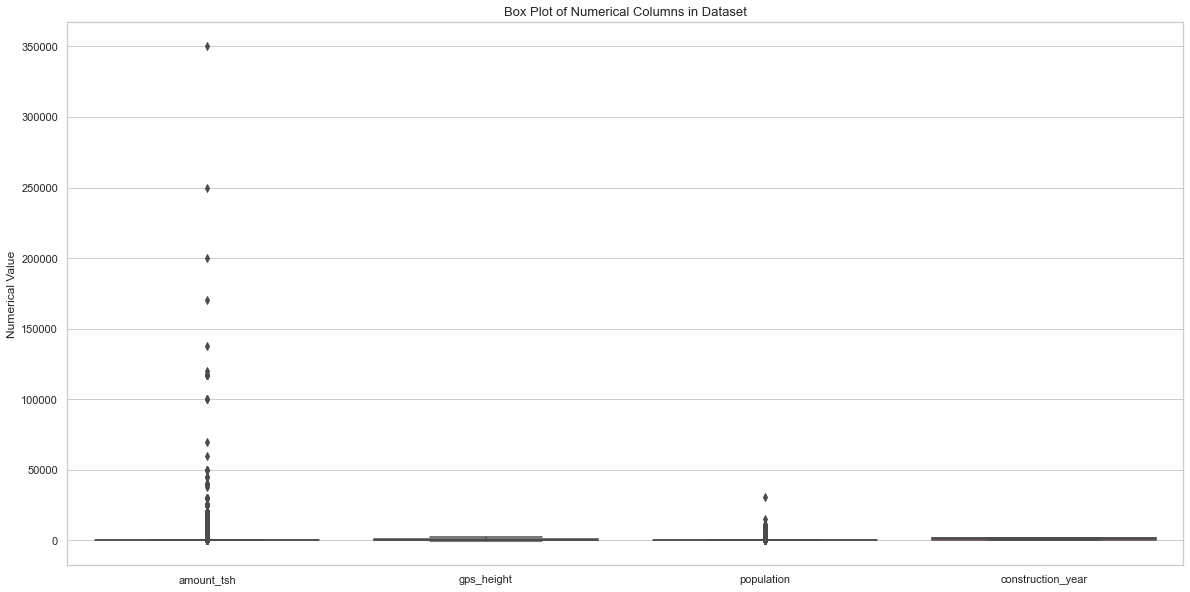

In [397]:
# Plotting box plots of numerical columns
numerical_cols = ['amount_tsh', 'gps_height', 'population', 'construction_year']
plt.figure(figsize=(20, 10))
sns.boxplot(data=[train[col] for col in numerical_cols])
plt.title("Box Plot of Numerical Columns in Dataset", fontsize=13)
plt.ylabel("Numerical Value")
plt.xticks(range(0,4), numerical_cols)
plt.show()

Amount Tsh appear to have outliers  but lets compare the status of wells against the amount spent and see if there is a reason to say they are really outliers

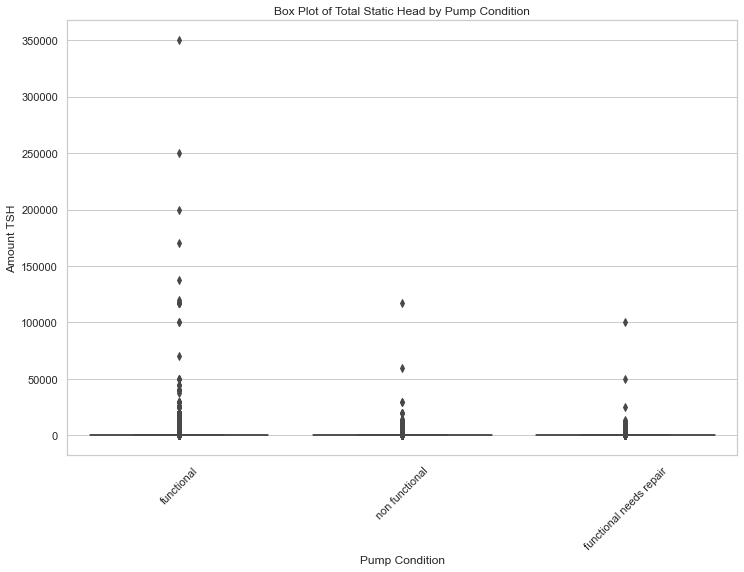

In [398]:
# Plot a box plot of total static head against pump condition
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.boxplot(x="status_group", y="amount_tsh", data=train, palette="Set1")

plt.title("Box Plot of Total Static Head by Pump Condition")
plt.xlabel("Pump Condition")
plt.ylabel("Amount TSH")
plt.xticks(rotation=45)

plt.show()

The outliers we see represents the value of well in Tanzania. and from the box plot we see that the more spending on well , the well is functional and the less spendings the well is either non-functional or needs repair.
From this I argue there is no outlier

#### Deal with Construction year colum

we have year recorded as 0, and the oldest year is 1960 so we assume the 0 year is previous year before 1960 and lets replace 0 with 1959


In [399]:
# Check value counts in 'construction_year' column
train['construction_year'].value_counts().head()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
Name: construction_year, dtype: int64

In [400]:
# Replace 0 values in construction_year with 1959 as a placeholder
train['construction_year'].replace(to_replace = 0, value = 1955, inplace=True)

In [401]:
# Check whether there are duplicates
train.duplicated(keep = 'first').sum()

0

In [402]:
# Check the value counts for each column again
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   gps_height             59400 non-null  int64  
 3   installer              59400 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   population             59400 non-null  int64  
 9   public_meeting         59400 non-null  int32  
 10  scheme_management      59400 non-null  object 
 11  permit                 59400 non-null  int32  
 12  construction_year      59400 non-null  int64  
 13  extraction_type_class  59400 non-null  object 
 14  management_group       59400 non-null  object 
 15  pa

### DESCRIPTIVE STATISTICS VISUALIZATION

TARGET FEATURE DISTRIBUTION

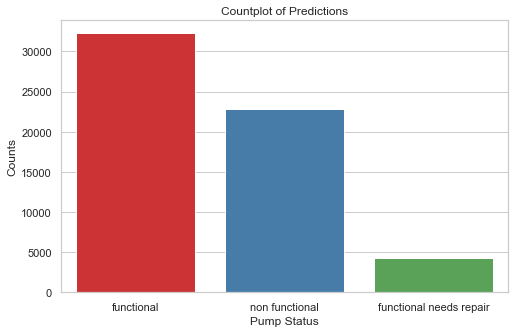

In [403]:
# Plot distribution of target variable.
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(train['status_group'], palette='Set1', ax=ax)
x_labels = train['status_group']

# Add labels
plt.title('Countplot of Predictions')
plt.xlabel('Pump Status')
#ax.set_xticklabels(x_labels, fontsize=10)
plt.ylabel('Counts')
plt.show()

The target classes are imbalanced, with the functional pumps being the most common at more than 30,000 followed by non-functional pumps at close to 23,000 pumps, and the lastly the funcational-need-repair pumps at less 5,000.

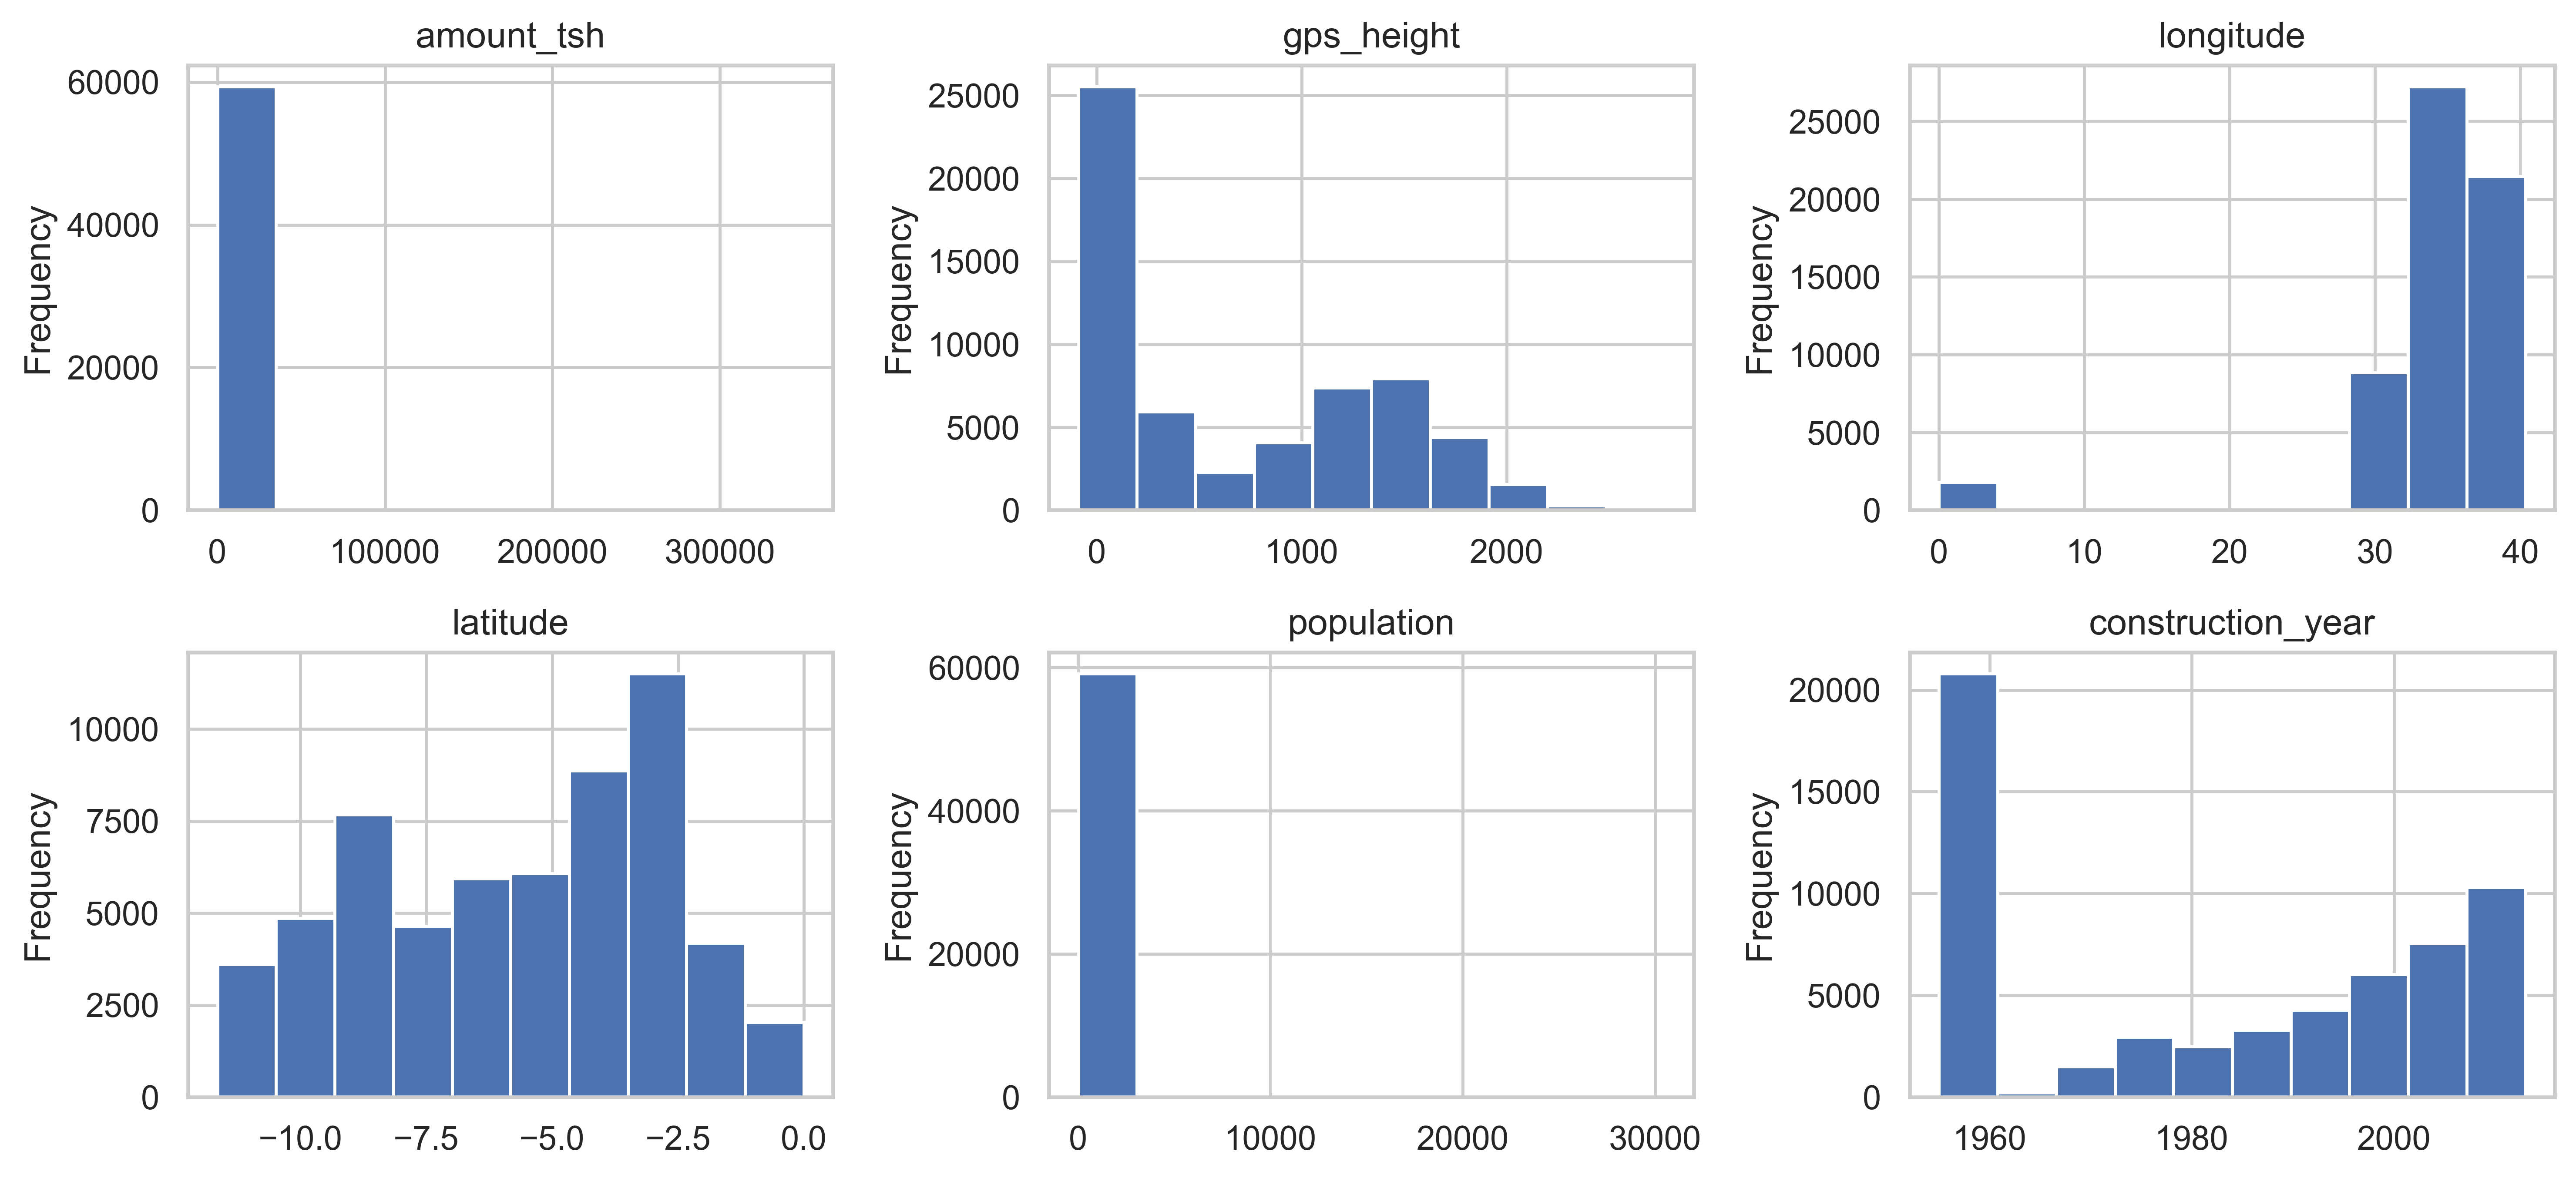

In [404]:
# Histogram of continuous variables
continuous = ['amount_tsh','gps_height','longitude','latitude','population','construction_year']
fig = plt.figure(figsize=(12, 8), dpi=500)
for i, col in enumerate(continuous):
    ax = plt.subplot(3, 3, i+1)
    train[col].plot(kind='hist', ax=ax, title=col)
plt.tight_layout()
plt.savefig('images/histograms_of_continuous_columns.jpg')
plt.show()

No continuous variable is normally distributed.

### Distribution Of Target Class By Categorical Feature Classes

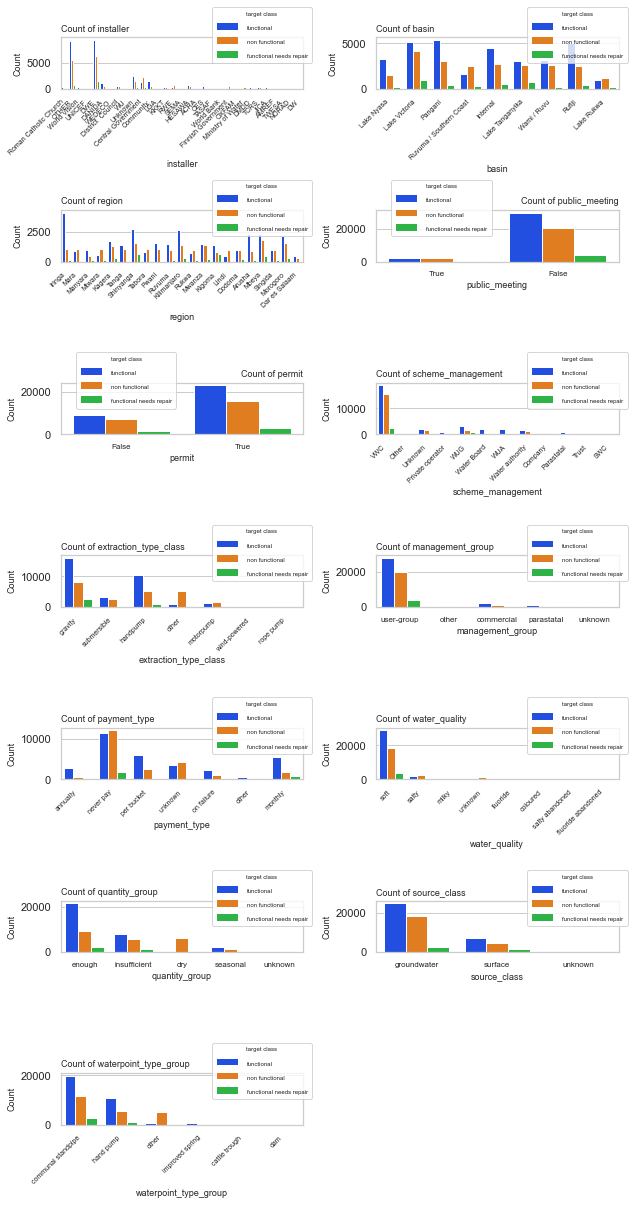

In [405]:
# Set up the subplots with 2 columns and increased spacing
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
fig.subplots_adjust(hspace=2.35, wspace=0.3)  # Increase hspace and wspace

# Create count bar plots for categorical variables

category = ['installer', 'basin', 'region', 'public_meeting', 'permit', 
           'scheme_management', 'extraction_type_class', 'management_group', 
           'payment_type', 'water_quality', 'quantity_group', 'source_class', 
           'waterpoint_type_group']

for i, column in enumerate(category):
    row, col = i // 2, i % 2
    sns.countplot(x=column, hue='status_group', palette='bright', data=train, 
                  ax=axes[row, col])
    axes[row, col].set_xlabel(column, fontsize=9)
    axes[row, col].set_ylabel('Count', fontsize=9)
    
    # Customize x-labels
    x_labels = train[column].unique()
    if len(x_labels) > 5:
        axes[row, col].set_title(f'Count of {column}', fontsize=9, loc='left')
        axes[row, col].set_xticks(range(len(x_labels))) # Set the positions of the ticks
        axes[row, col].set_xticklabels(x_labels, fontsize=7, rotation=45, 
                                       ha='right') # Rotate labels by 45 degrees
        # Add legend above each subplot
        legend = axes[row, col].legend(title='target class', title_fontsize=6, 
                                       loc='upper left', bbox_to_anchor=(0.6, 1.7))
        for label in legend.get_texts():
            label.set_fontsize(6)
    
    elif column in ['permit', 'public_meeting']:
        axes[row, col].set_title(f'Count of {column}', fontsize=9, loc='right')
        x_labels_bool = x_labels.astype(bool)
        axes[row, col].set_xticks(range(len(x_labels_bool))) # Set the positions of the ticks
        axes[row, col].set_xticklabels(x_labels_bool, fontsize=8)
        
        # Add legend above each subplot
        legend = axes[row, col].legend(title='target class', title_fontsize=6, 
                                       loc='upper right', bbox_to_anchor=(0.5, 1.7))
        for label in legend.get_texts():
            label.set_fontsize(6)

    else:
        axes[row, col].set_title(f'Count of {column}', fontsize=9, loc='left')
        axes[row, col].set_xticks(range(len(x_labels))) # Set the positions of the ticks
        axes[row, col].set_xticklabels(x_labels, fontsize=8)

        # Add legend above each subplot
        legend = axes[row, col].legend(title='target class', title_fontsize=6, 
                                       loc='upper left', bbox_to_anchor=(0.6, 1.7))
        for label in legend.get_texts():
            label.set_fontsize(6)
            
# Remove any empty subplots
for i in range(len(category), len(axes.flat)):
    fig.delaxes(axes.flatten()[i])
plt.savefig('images/distribution_of_target_class_vs_categorical_features.jpg') #, bbox_inches='tight'
plt.show()

We notice that some classes of the predictor categories have a higher overall count of the target compared to other classes, corresponding to the higher frequency of the respective class.

We also notice that in most of these classes, the functional pumps are more frequent than functional-needs-repair and non-functional pumps. This could be attributed to the fact that there are much more functional pumps than functional-needs-repair and non-functional pumps.

A notable deviation from this trend is the never-pay class of the payment-type category, where non-functional pumps are more than the other classes of pumps.

### Distribution Of Target Class By Continuous Features

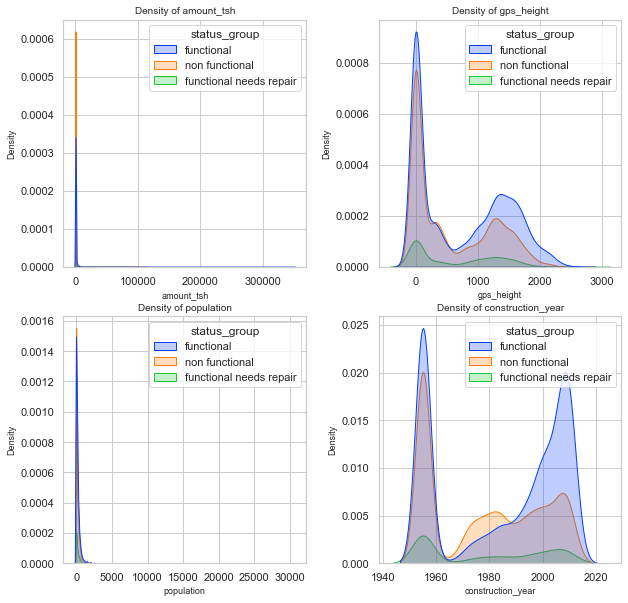

In [406]:
# Set up the subplots with 2 columns and increased spacing
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.2, wspace=0.3)  # Increase hspace and wspace

# Create count bar plots for continuous variables
continuous = ['amount_tsh','gps_height',
              'population','construction_year']

for i, column in enumerate(continuous):
    row, col = i // 2, i % 2
    sns.kdeplot(data=train, x=column, hue='status_group', palette='bright', 
                fill=True, ax=axes[row, col])
    axes[row, col].set_title(f'Density of {column}', fontsize=10)
    axes[row, col].set_xlabel(column, fontsize=9)
    axes[row, col].set_ylabel('Density', fontsize=9)
    
plt.savefig('images/density_of_target_class_vs_continuous_features.jpg')
plt.show()

For the total static head feature (amount_tsh), waterpoints with zero static head have the highest density of pumps overall. Also, among the three pump classes at this point, non-functional pumps have the highest density followed by functional pumps. Functional-needs-repair pumps are the least.

For the population feature, waterpoints located in areas with zero population have the highest density of pumps overall. Also, among the three pump classes at this point, non-functional pumps have the highest density followed by functional pumps. Functional-needs-repair pumps are the least.

For the construction year feature, the year 1955 has a high density of pumps, but these are the year 0 rows which I imputed with 1955. The KDE plot also shows that the density of functional pumps is higher among the newest pumps while non-functional pumps are higher among the older pumps, from around 1965 to 1990.

### DATA PREPROCESSING

In [407]:
# Check the unique values in status_group column
train['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [408]:
# SPLIT THE DATASET INTO FEATURES AND TARGET VARIABLE
# Assign status_group column to y series
y = train['status_group']

# Drop status_group to create X dataframe
X = train.drop('status_group', axis=1)

# Print first 5 rows of X
X.head()

id  amount_tsh  gps_height              installer  longitude   latitude  \
0  69572      6000.0        1390  Roman Catholic Church  34.938093  -9.856322   
1   8776         0.0        1399                  OTHER  34.698766  -2.147466   
2  34310        25.0         686           World Vision  37.460664  -3.821329   
3  67743         0.0         263                 UNICEF  38.486161 -11.155298   
4  19728         0.0           0                  OTHER  31.130847  -1.825359   

                     basin   region  population  public_meeting  \
0               Lake Nyasa   Iringa         109               1   
1            Lake Victoria     Mara         280               1   
2                  Pangani  Manyara         250               1   
3  Ruvuma / Southern Coast   Mtwara          58               1   
4            Lake Victoria   Kagera           0               1   

  scheme_management  permit  construction_year extraction_type_class  \
0               VWC       0               1999               gravity   
1             Other       1               2010               gravity   
2               VWC       1               2009               gravity   
3               VWC       1               1986           submersible   
4           Unknown       1               1955               gravity   

  management_group payment_type water_quality quantity_group source_class  \
0       user-group     annually          soft         enough  groundwater   
1       user-group    never pay          soft   insufficient      surface   
2       user-group   per bucket          soft         enough      surface   
3       user-group    never pay          soft            dry  groundwater   
4            other    never pay          soft       seasonal      surface   

  waterpoint_type_group  
0    communal standpipe  
1    communal standpipe  
2    communal standpipe  
3    communal standpipe  
4    communal standpipe

In [409]:
category_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64','int32', 'float64']).columns

In [410]:
X = pd.get_dummies(X, columns=category_columns)
X

id  amount_tsh  gps_height  longitude   latitude  population  \
0      69572      6000.0        1390  34.938093  -9.856322         109   
1       8776         0.0        1399  34.698766  -2.147466         280   
2      34310        25.0         686  37.460664  -3.821329         250   
3      67743         0.0         263  38.486161 -11.155298          58   
4      19728         0.0           0  31.130847  -1.825359           0   
...      ...         ...         ...        ...        ...         ...   
59395  60739        10.0        1210  37.169807  -3.253847         125   
59396  27263      4700.0        1212  35.249991  -9.070629          56   
59397  37057         0.0           0  34.017087  -8.750434           0   
59398  31282         0.0           0  35.861315  -6.378573           0   
59399  26348         0.0         191  38.104048  -6.747464         150   

       public_meeting  permit  construction_year  installer_ACRA  ...  \
0                   1       0               1999               0  ...   
1                   1       1               2010               0  ...   
2                   1       1               2009               0  ...   
3                   1       1               1986               0  ...   
4                   1       1               1955               0  ...   
...               ...     ...                ...             ...  ...   
59395               1       1               1999               0  ...   
59396               1       1               1996               0  ...   
59397               1       0               1955               0  ...   
59398               1       1               1955               0  ...   
59399               1       1               2002               0  ...   

       quantity_group_unknown  source_class_groundwater  source_class_surface  \
0                           0                         1                     0   
1                           0                         0                     1   
2                           0                         0                     1   
3                           0                         1                     0   
4                           0                         0                     1   
...                       ...                       ...                   ...   
59395                       0                         1                     0   
59396                       0                         0                     1   
59397                       0                         1                     0   
59398                       0                         1                     0   
59399                       0                         1                     0   

       source_class_unknown  waterpoint_type_group_cattle trough  \
0                         0                                    0   
1                         0                                    0   
2                         0                                    0   
3                         0                                    0   
4                         0                                    0   
...                     ...                                  ...   
59395                     0                                    0   
59396                     0                                    0   
59397                     0                                    0   
59398                     0                                    0   
59399                     0                                    0   

       waterpoint_type_group_communal standpipe  waterpoint_type_group_dam  \
0                                             1                          0   
1                                             1                          0   
2                                             1                          0   
3                                             1                          0   
4                                             1                 

In [411]:
X = X.drop('id', axis=1)

### MACHINE LEARNING MODELLING

Failing to predict functional pumps that need repair may lead to high maintenance cost later and it may also cause the government and other actors to continue using ineffective equipment and methods in building wells.

Conversely, lowering the sensitivity of the model so as to correctly predict all faulty pumps would also increase the false positive rate. This would lead to time and resources wasted in servicing to non-faulty pumps.

Classifying all the pumps correctly would save the government resources that are much needed to build new sources of water. Therefore, I choose f1-score as the best performance metric for this project, since it can only be high when both precision and recall are high.

For this project, I will build several models using different classifiers and then compare the performance metrics to choose the best classifier. These will be:
1. Logistic Regression
2. Decision Tree Classifier
3. eXtreme Gradient Boosting (XGBoost)

### TRAIN-TEST SPLIT
The training set will be 80% of the data and the testing set 20%. I will also maintain a random state of 96 to ensure reproducibility.

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=96)

In [413]:
X_train.describe()

amount_tsh    gps_height     longitude      latitude    population  \
count   47520.000000  47520.000000  47520.000000  4.752000e+04  47520.000000   
mean      323.955186    664.988721     34.089408 -5.713519e+00    179.395749   
std      3239.005985    692.178664      6.561428  2.945980e+00    470.631239   
min         0.000000    -90.000000      0.000000 -1.164944e+01      0.000000   
25%         0.000000      0.000000     33.096872 -8.560007e+00      0.000000   
50%         0.000000    363.000000     34.912111 -5.031429e+00     25.000000   
75%        20.000000   1317.000000     37.192052 -3.327282e+00    213.000000   
max    350000.000000   2628.000000     40.345193 -2.000000e-08  30500.000000   

       public_meeting        permit  construction_year  installer_ACRA  \
count    47520.000000  47520.000000       47520.000000    47520.000000   
mean         0.914668      0.704314        1982.173295        0.004461   
std          0.279379      0.456355          22.327141        0.066644   
min          0.000000      0.000000        1955.000000        0.000000   
25%          1.000000      0.000000        1955.000000        0.000000   
50%          1.000000      1.000000        1985.000000        0.000000   
75%          1.000000      1.000000        2004.000000        0.000000   
max          1.000000      1.000000        2013.000000        1.000000   

       installer_AMREF  ...  quantity_group_unknown  source_class_groundwater  \
count     47520.000000  ...            47520.000000              47520.000000   
mean          0.005661  ...                0.013763                  0.771086   
std           0.075026  ...                0.116505                  0.420138   
min           0.000000  ...                0.000000                  0.000000   
25%           0.000000  ...                0.000000                  1.000000   
50%           0.000000  ...                0.000000                  1.000000   
75%           0.000000  ...                0.000000                  1.000000   
max           1.000000  ...                1.000000                  1.000000   

       source_class_surface  source_class_unknown  \
count          47520.000000          47520.000000   
mean               0.224263              0.004651   
std                0.417101              0.068038   
min                0.000000              0.000000   
25%                0.000000              0.000000   
50%                0.000000              0.000000   
75%                0.000000              0.000000   
max                1.000000              1.000000   

       waterpoint_type_group_cattle trough  \
count                         47520.000000   
mean                              0.001957   
std                               0.044196   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       waterpoint_type_group_communal standpipe  waterpoint_type_group_dam  \
count                              47520.000000               47520.000000   
mean                                   0.581271                   0.000126   
std                                    0.493356                   0.011236   
min                                    0.000000                   0.000000   
25%                                    0.000000                   0.000000   
50%                                    1.000000                   0.000000   
75%                                    1.000000                   0.000000   
max                                    1.000000                   1.000000   

       waterpoint_type_group_hand pump  waterpoint_type_group_improved spring  \
count                     47520.000000                           47520.000000   
mean                          0.295518                               0.013321   
std                           0.456280               

### Create a baseline Model - LOGISTIC REGRESSION

In [414]:
# Logistic Regression Model
logistic_model = LogisticRegression(random_state=96)

# Fit the model on training data
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=96)

In [415]:
# predict on the test set
y_pred_log = logistic_model.predict(X_test)
y_score_log = logistic_model.fit(X_train, y_train).decision_function(X_test)



In [644]:
def model_score(model, y_true, y_pred, y_train, y_pred_train):
        # Print classification report, accuracy, precision, recall, f1_score 
        separator = "=" * 70

        print(f"\n{separator}")
        print('MODEL REPORT')
        print(f'{separator}')
        print(classification_report(y_true, y_pred))
        print(f"\n{separator}")

        print('MODEL METRICS - TRAIN SET')
        print(f'{separator}')
        print("Overall accuracy score", accuracy_score(y_train, y_pred_train))
        print("Overall precision score", precision_score(y_train, y_pred_train, average='weighted'))
        print("Overall recall score", recall_score(y_train, y_pred_train, average='weighted'))
        print("Overall F1-score", f1_score(y_train, y_pred_train, average='weighted'))


        print('MODEL METRICS - TEST SET')
        print(f'{separator}')
        print("Overall accuracy score", accuracy_score(y_true, y_pred))
        print("Overall precision score", precision_score(y_true, y_pred, average='weighted'))
        print("Overall recall score", recall_score(y_true, y_pred, average='weighted'))
        print("Overall F1-score", f1_score(y_true, y_pred, average='weighted'))

        #print(f"\n{separator}")
        #print('ROC AUC SCORE')
        #print(f'{separator}')
        #fpr, tpr, thresholds = roc_curve(y_test, y_score_log, multi_class='ovr')
        #print("AUC", auc(fpr, tpr))

        print(f"\n{separator}")
        print('CONFUSION MATRIX')
        print(f'{separator}')

        # Print a confusion matrix    
        cnf_matrix = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=model.classes_)      
        return disp.plot(cmap='Reds')


MODEL REPORT
                         precision    recall  f1-score   support

             functional       0.68      0.84      0.75      6506
functional needs repair       0.00      0.00      0.00       813
         non functional       0.67      0.56      0.61      4561

               accuracy                           0.68     11880
              macro avg       0.45      0.47      0.45     11880
           weighted avg       0.63      0.68      0.65     11880


MODEL METRICS
Overall accuracy score 0.6758417508417508
Overall precision score 0.6290721223866641
Overall recall score 0.6758417508417508
Overall F1-score 0.6460278059782546

CONFUSION MATRIX


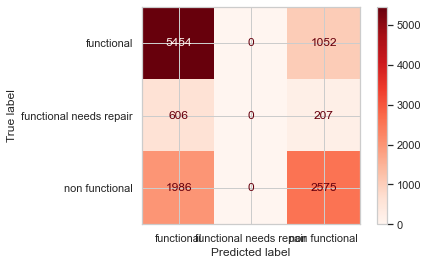

In [417]:
model_score(logistic_model, y_test, y_pred_log)

our baseline mode has a F1 score of approximately 0.65

In [418]:
# Create a Function for Cross Validation test
def cross_val_test(K_folds, model_instance, X, y):
    
    # Plot a distribution of train and test accuracies over a range of K folds
    train_accuracy = []
    test_accuracy = []

    for fold in K_folds:
        # Instantiate classifier model
        model = model_instance

        # Perform cross-validation on full dataset to evaluate model performance
        cv_scores = cross_validate(model, X, y, cv=fold, return_train_score=True)

        # Find mean train and test scores
        mean_train_score = np.mean(cv_scores['train_score'])
        mean_test_score = np.mean(cv_scores['test_score'])

        # Append the lists for mean scores
        train_accuracy.append(mean_train_score)
        test_accuracy.append(mean_test_score)

    # Plot the mean train and test scores against K fold
    plt.plot(K_folds, train_accuracy, label='Train score')
    plt.plot(K_folds, test_accuracy, label='Test score')
    plt.xlabel('Cross Validation Fold')
    plt.ylabel('Accuracy Score')
    plt.legend();
    return f"This is the Cross Validation Test for {model_instance}"

'This is the Cross Validation Test for LogisticRegression(random_state=96)'

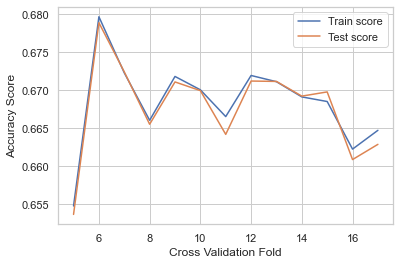

In [419]:
cross_val_test(K_folds=range(5,18),model_instance=logistic_model, X=X, y=y)

From the distribution of accuracy across different K folds, we observe the test accuracy score closely matches that of the train score. Therefore, the model is not overfitting. Both train and test accuracy scores are at their highest and closest at K-fold=6.

However, the accuracy scores are lower than that of the baseline logistic regression model. This shows that cross validation does not improve performance

#### lets standardize the data

In [420]:
standard_scaler = StandardScaler()
# Fit the scaler on the training data
standard_scaler.fit(X_train)
# Transform the training and test data
X_train_scaled = standard_scaler.transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)


MODEL REPORT
                         precision    recall  f1-score   support

             functional       0.72      0.90      0.80      6506
functional needs repair       0.38      0.04      0.07       813
         non functional       0.79      0.62      0.70      4561

               accuracy                           0.74     11880
              macro avg       0.63      0.52      0.52     11880
           weighted avg       0.72      0.74      0.71     11880


MODEL METRICS - TRAIN SET
Overall accuracy score 0.7325757575757575
Overall precision score 0.720310247605147
Overall recall score 0.7325757575757575
Overall F1-score 0.705348701132288
MODEL METRICS - TEST SET
Overall accuracy score 0.7371212121212121
Overall precision score 0.7231107890495216
Overall recall score 0.7371212121212121
Overall F1-score 0.7108484560264827

CONFUSION MATRIX


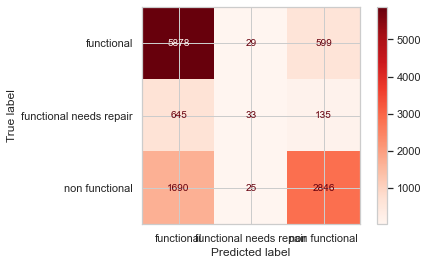

In [651]:
logistic_model_scaled = LogisticRegression(random_state=96)
# Fit the model on scaled training data
logistic_model_scaled.fit(X_train_scaled, y_train)  
# Predict on the scaled test set
y_pred_log_scaled = logistic_model_scaled.predict(X_test_scaled)
model_score(logistic_model_scaled, y_test, y_pred_log_scaled, y_train, logistic_model_scaled.predict(X_train_scaled))

By scalling this improved the model efficiency. lets perform Decision tree using our scaled data and compare with the logistic regression model

'This is the Cross Validation Test for LogisticRegression(random_state=96)'

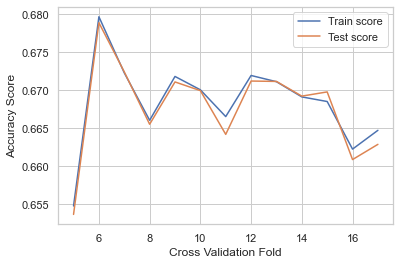

In [422]:
cross_val_test(K_folds=range(5,18), model_instance=logistic_model_scaled, X=X, y=y)

Still this shows no overfitting.Infact the graph is similar to the previous one where X was not scaled. This means that our logistic model does not overfit on both scaled and non scale data

### DECISION TREE MODELLING


MODEL REPORT
                         precision    recall  f1-score   support

             functional       0.80      0.79      0.79      6506
functional needs repair       0.33      0.35      0.34       813
         non functional       0.76      0.76      0.76      4561

               accuracy                           0.75     11880
              macro avg       0.63      0.63      0.63     11880
           weighted avg       0.75      0.75      0.75     11880


MODEL METRICS - TRAIN SET
Overall accuracy score 0.9944654882154882
Overall precision score 0.9944575317835552
Overall recall score 0.9944654882154882
Overall F1-score 0.9944513859803178
MODEL METRICS - TEST SET
Overall accuracy score 0.7500841750841751
Overall precision score 0.7518565755119588
Overall recall score 0.7500841750841751
Overall F1-score 0.7509395788153493

CONFUSION MATRIX


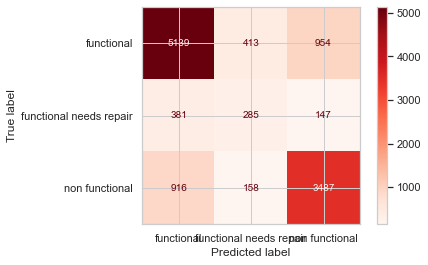

In [645]:
tree_model = DecisionTreeClassifier(random_state=96)
# Fit the model on training data
tree_model.fit(X_train_scaled, y_train)
# Predict on the train set
y_pred_on_train = tree_model.predict(X_train_scaled)
# Predict on the test set
y_pred_tree_scaled = tree_model.predict(X_test_scaled)
model_score(tree_model, y_test, y_pred_tree_scaled, y_train, y_pred_on_train)


Decision tree shows a metric improvement compared to the logistic regression model

Lets check if the decision tree model is overfitting

'This is the Cross Validation Test for DecisionTreeClassifier(random_state=96)'

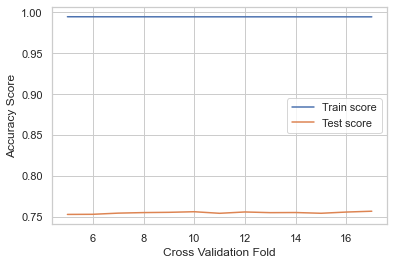

In [424]:
cross_val_test(K_folds=range(5,18), model_instance=tree_model, X=X, y=y)

With cross validation, the performance of the decision tree classifier does not seem to improve from the accuracy of 0.75008 scored by the first decision tree classifier. We can also see that the model is overfitting.

This overfitting issue would be caused by having class imbalances on our target valuable

### Tune Decision Trees Parameters


MODEL REPORT
                         precision    recall  f1-score   support

             functional       0.81      0.65      0.72      6506
functional needs repair       0.21      0.72      0.33       813
         non functional       0.78      0.67      0.72      4561

               accuracy                           0.66     11880
              macro avg       0.60      0.68      0.59     11880
           weighted avg       0.76      0.66      0.70     11880


MODEL METRICS - TRAIN SET
Overall accuracy score 0.7135521885521886
Overall precision score 0.8024807845365493
Overall recall score 0.7135521885521886
Overall F1-score 0.7402356544447729
MODEL METRICS - TEST SET
Overall accuracy score 0.6633838383838384
Overall precision score 0.7605705633202718
Overall recall score 0.6633838383838384
Overall F1-score 0.6958791513776311

CONFUSION MATRIX


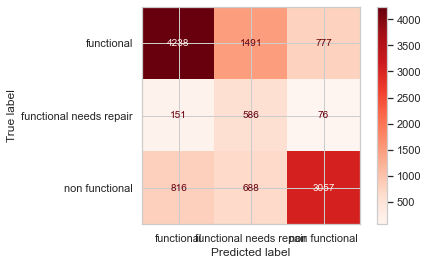

In [649]:
tree_model2 = DecisionTreeClassifier(
    max_depth=60,
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',
    criterion='gini',
    class_weight='balanced',
    random_state=96)

# Fit the model on training data
tree_model2.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_tree2_scaled = tree_model2.predict(X_test_scaled)
model_score(tree_model2, y_test, y_pred_tree2_scaled, y_train, tree_model2.predict(X_train_scaled))

"This is the Cross Validation Test for DecisionTreeClassifier(class_weight='balanced', max_depth=60,\n                       max_features='sqrt', min_samples_leaf=5,\n                       min_samples_split=5, random_state=96)"

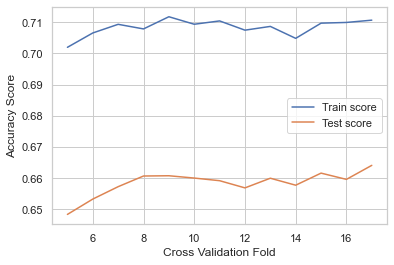

In [446]:
cross_val_test(K_folds=range(5, 18), model_instance=tree_model2, X=X, y=y)

The Decision Trees classifier with tuned hyperparameters has not achieved the best accuracy and F1-scores out of all the models that I have tested. The accuracy has reduced to 0.663 from 0.75 with the baseline decision tree classifier.

However, the gaps between the train and test scores has decreased by more than 0.23 of a unit (at least 23%) which means that the model has reduced overfitting, But the metrics have reduced.

I will therefore, take perform XGBoost classifier as my next model.

### XG Boost Modelling


MODEL REPORT
                         precision    recall  f1-score   support

             functional       0.78      0.91      0.84      6506
functional needs repair       0.65      0.23      0.34       813
         non functional       0.84      0.74      0.79      4561

               accuracy                           0.80     11880
              macro avg       0.76      0.63      0.65     11880
           weighted avg       0.79      0.80      0.78     11880


MODEL METRICS - TRAIN SET
Overall accuracy score 0.8293350168350169
Overall precision score 0.8319071109633489
Overall recall score 0.8293350168350169
Overall F1-score 0.8186159596319987
MODEL METRICS - TEST SET
Overall accuracy score 0.7968013468013468
Overall precision score 0.793916660876027
Overall recall score 0.7968013468013468
Overall F1-score 0.7844948789304663

CONFUSION MATRIX


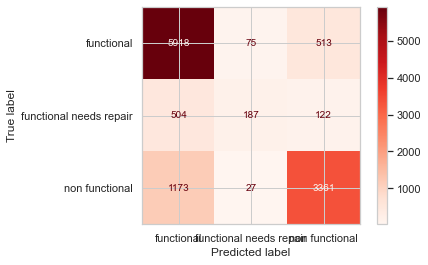

In [650]:
xgb_model = XGBClassifier(random_state=96)
# Fit the model on training data
xgb_model.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred_xgb_scaled = xgb_model.predict(X_test_scaled)
model_score(xgb_model, y_test, y_pred_xgb_scaled, y_train, xgb_model.predict(X_train_scaled))

In [447]:
#cross_val_test(K_folds=range(5,18), model_instance=xgb_model, X=X, y=y)

### AUC - ROC CURVE ANALYSIS

In [652]:
y_pred_log_scaled_proba = logistic_model_scaled.fit(X_test_scaled, y_test).decision_function(X_test_scaled)

y_pred_tree_scaled_proba = tree_model2.fit(X_test_scaled, y_test).predict_proba(X_test_scaled)
y_pred_xgb_scaled_proba = xgb_model.fit(X_test_scaled, y_test).predict_proba(X_test_scaled)

In [653]:
y_pred_xgb_scaled

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'functional'], dtype=object)

In [654]:
y_pred_tree_scaled
y_test
lb = LabelBinarizer()

# Fit the label binarizer on the multiclass labels
lb.fit_transform(y_test)

# Transform the multiclass labels into a binary format
y_multi_test = lb.transform(y_test)

# binarize all predictions from all 3 models

# for Logistic Regression model
#lb.fit_transform(y_pred_log_scaled_proba)
#y_pred_log_scaled_proba = lb.transform(y_pred_log_scaled_proba)

# for Decision Tree model
#lb.fit_transform(y_pred_tree_scaled_proba)
#y_pred_tree_scaled_proba = lb.transform(y_pred_tree_scaled_proba)

# for XGBoost model
#lb.fit_transform(y_pred_xgb_scaled_proba)
#y_pred_xgb_scaled_proba = lb.transform(y_pred_xgb_scaled_proba)

# fit the label binarizer on the predicted labels
#y_pred_log_scaled = lb.fit_transform(y_pred_log_scaled)
# Transform the predicted labels into a binary format
#y_pred_log_scaled = lb.transform(y_pred_log_scaled)

# Initialize variables to store AUC scores
logistic_model_scaled_auc = 0
tree_model_auc = 0
xgb_model_auc = 0


# Calculate AUC ROC score using predicted y for each model

for class_index in range(y_multi_test.shape[1]):  # Iterate over classes
    logistic_model_scaled_auc += roc_auc_score(y_multi_test[:, class_index], y_pred_log_scaled_proba[:, class_index])
    tree_model_auc += roc_auc_score(y_multi_test[:, class_index], y_pred_tree_scaled_proba[:, class_index])
    xgb_model_auc += roc_auc_score(y_multi_test[:, class_index], y_pred_xgb_scaled_proba[:, class_index])
    

# Calculate the mean AUC score over classes
num_classes = y_multi_test.shape[1]
logistic_model_scaled_auc /= num_classes
tree_model_auc /= num_classes
xgb_model_auc /= num_classes


print(f'The AUC score for Logistic Regression model is: {round(logistic_model_scaled_auc, 4)}')
print(f'The AUC score for Decision Tree model is: {round(tree_model_auc, 4)}')
print(f'The AUC score for XGBoost model is: {round(xgb_model_auc, 4)}')   



The AUC score for Logistic Regression model is: 0.813
The AUC score for Decision Tree model is: 0.8895
The AUC score for XGBoost model is: 0.9745


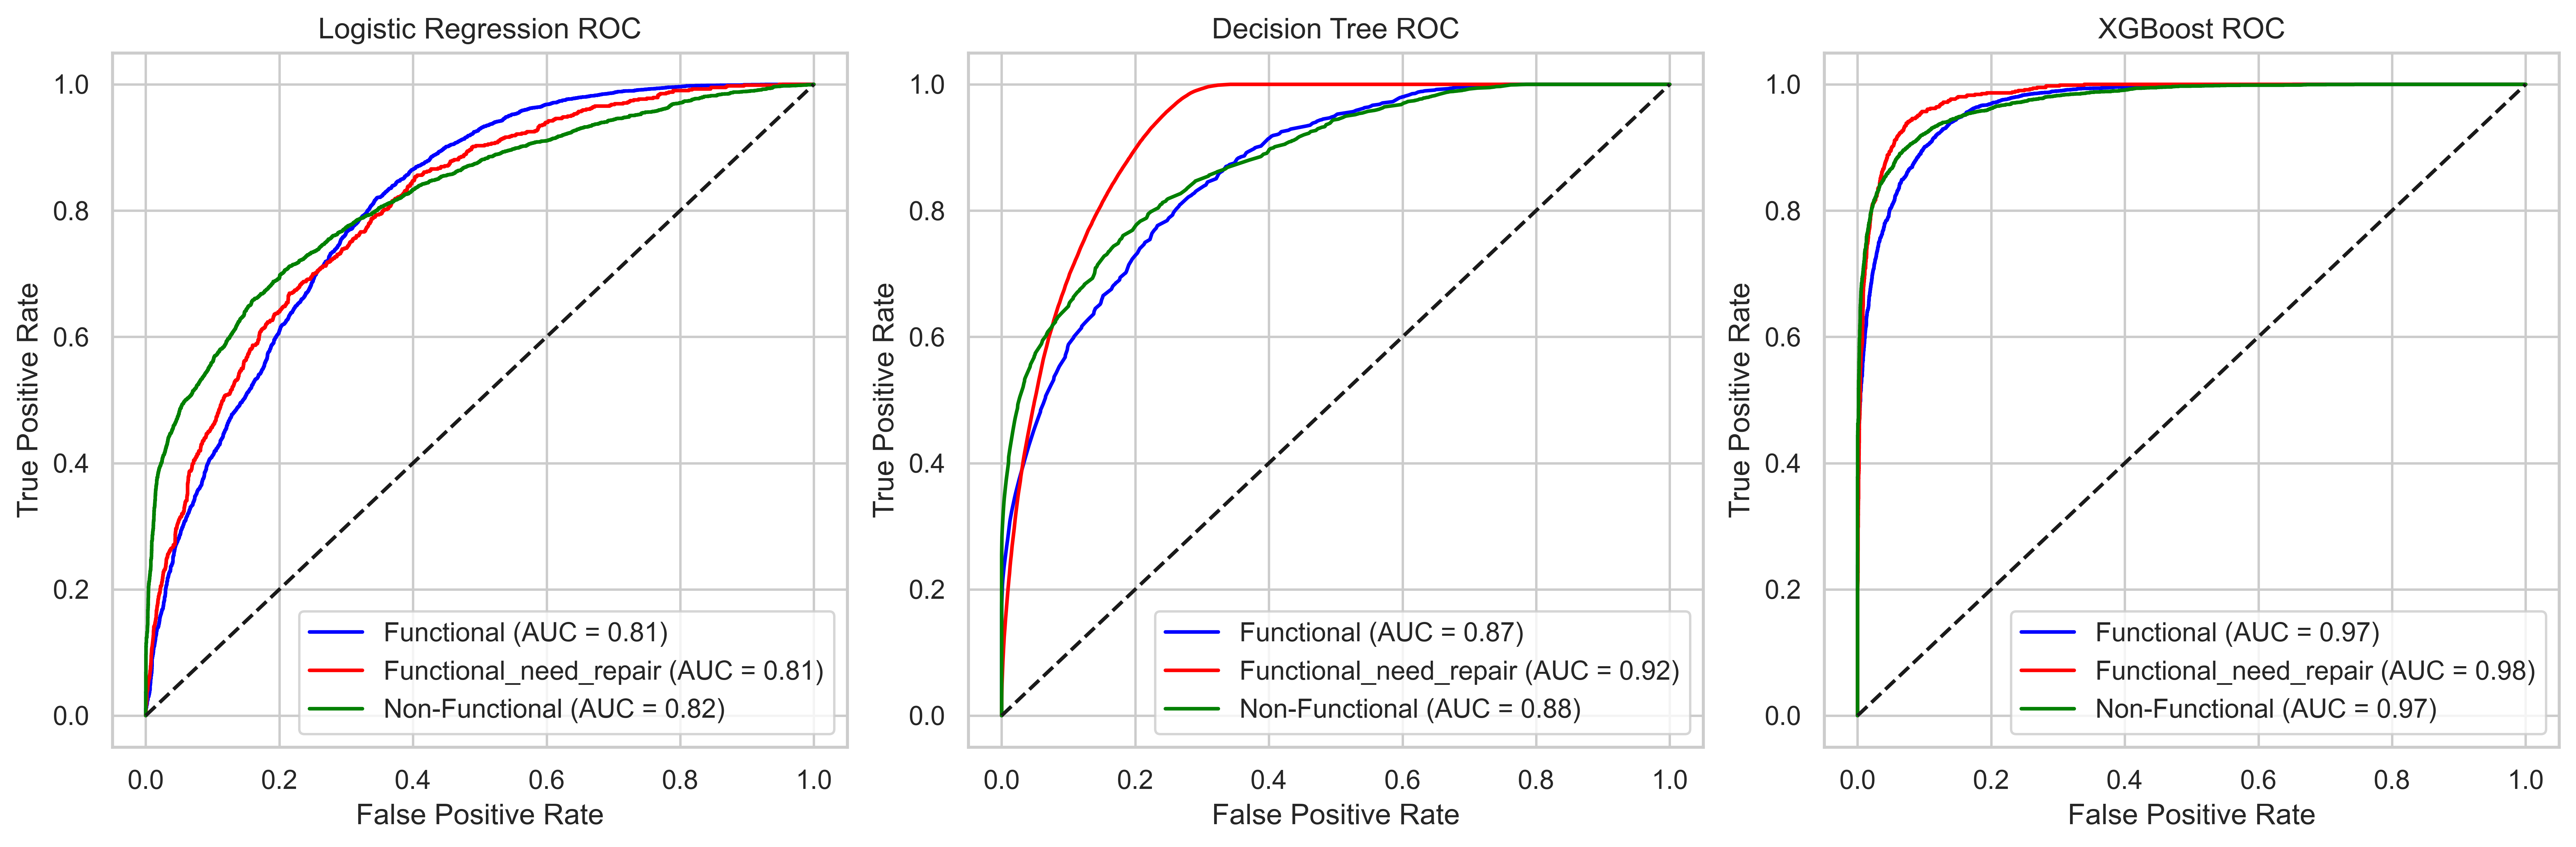

In [666]:

# Create a figure with 1 row and 3 columns (side-by-side)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=500)  # Width=18", Height=5"

# Define colors and line styles for each class
class_colors = ['blue', 'red', 'green']
class_names = ['Functional', 'Functional_need_repair', 'Non-Functional']  # Adjust if you have different names
no_of_classes = len(class_names)
# --- Plot Logistic Regression ---
for j in range(no_of_classes):
    fpr, tpr, _ = roc_curve(y_multi_test[:, j], y_pred_log_scaled_proba[:, j])
    roc_auc = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, color=class_colors[j], 
                label=f'{class_names[j]} (AUC = {roc_auc:.2f})')

axes[0].set_title('Logistic Regression ROC')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].plot([0, 1], [0, 1], 'k--')  # Diagonal line
axes[0].legend(loc='lower right')
axes[0].grid(True)

# --- Plot Decision Tree ---
for j in range(no_of_classes):
    fpr, tpr, _ = roc_curve(y_multi_test[:, j], y_pred_tree_scaled_proba[:, j])
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color=class_colors[j], 
                label=f'{class_names[j]} (AUC = {roc_auc:.2f})')

axes[1].set_title('Decision Tree ROC')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].legend(loc='lower right')
axes[1].grid(True)

# --- Plot XGBoost ---
for j in range(no_of_classes):
    fpr, tpr, _ = roc_curve(y_multi_test[:, j], y_pred_xgb_scaled_proba[:, j])
    roc_auc = auc(fpr, tpr)
    axes[2].plot(fpr, tpr, color=class_colors[j], 
                label=f'{class_names[j]} (AUC = {roc_auc:.2f})')

axes[2].set_title('XGBoost ROC')
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].plot([0, 1], [0, 1], 'k--')
axes[2].legend(loc='lower right')
axes[2].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('images/AUC-ROC Curve analysis.jpg')
plt.show()

From the above visuals, XGBoost shows to be the best model since the 3 class shows a fpr tpr tradeoff close to 1.0 at TPR(true positive rate) compared to other models.

Comparing Test set and Train test, Logistic Regression model shows underfitting while Tuned Decision Tree model doesn`t neither shows overfitiing nor underfitting compared to both train set and test set, however its metrics are so low and this makes us decide to select XGBoost which has high metrics.

We conclude that XGBoost will be final model since the difference in metrics between train set and test set is 0.04 which is a tiny effect to say that our model is overfitting. It performed well with high metrics than other models, has an accuracy score of 0.7968 and a f1 score of 0.7845 on test set, an accuracy score of 0.829 and a f1 score of 0.819 on train set, we are going to use F1 score as our metric since our target classes were imbalanced and thus 0.7845 is a high scoring from all models we created.

Below are XGBoost metrics comparison

MODEL METRICS - TRAIN SET 

Overall accuracy score 0.8293350168350169

Overall precision score 0.8319071109633489

Overall recall score 0.8293350168350169

Overall F1-score 0.8186159596319987


MODEL METRICS - TEST SET

Overall accuracy score 0.7968013468013468

Overall precision score 0.793916660876027

Overall recall score 0.7968013468013468

Overall F1-score 0.7844948789304663

### Get Best Performing Features from our final model

In [449]:
# For the final model, create a list of features sorted by importance

features_rank = pd.Series(xgb_model.feature_importances_,
                          index=X.columns).sort_values(ascending=False)
features_rank

quantity_group_dry                     0.181993
waterpoint_type_group_other            0.094360
basin_Lake Nyasa                       0.035804
region_Iringa                          0.034325
region_Mara                            0.021365
                                         ...   
waterpoint_type_group_cattle trough    0.001468
water_quality_coloured                 0.001454
waterpoint_type_group_dam              0.001094
installer_AMREF                        0.000856
water_quality_fluoride abandoned       0.000640
Length: 122, dtype: float32

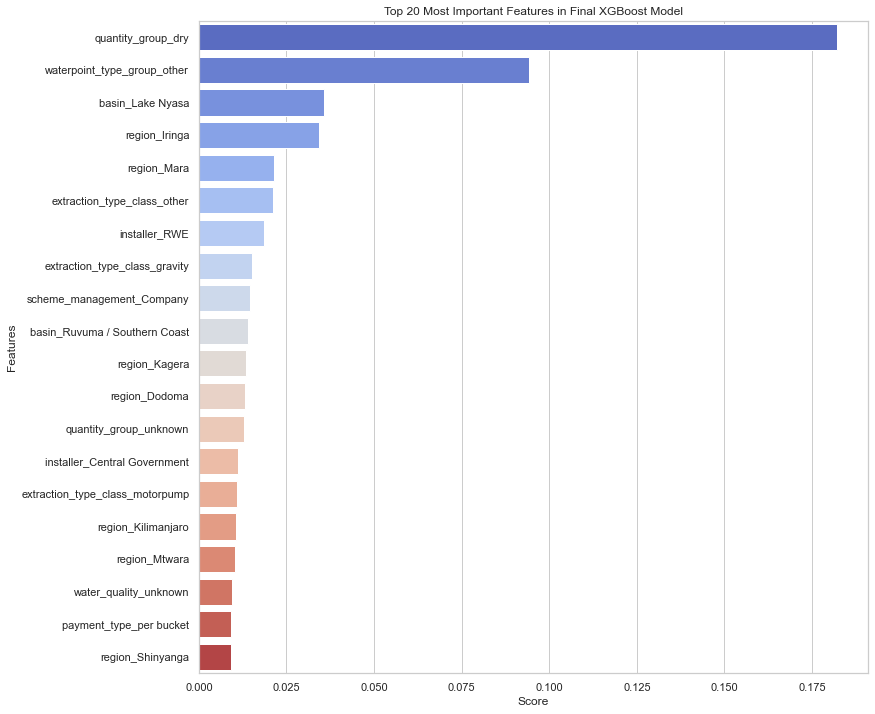

In [665]:

# Creating a bar plot with the top 20 features
plt.figure(figsize=(12,12))
sns.barplot(x=features_rank[0:20], y=features_rank[0:20].index, palette='coolwarm')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title("Top 20 Most Important Features in Final XGBoost Model")
plt.savefig('images/Top 20 Important Features on Modelling.jpg')
plt.show()

### CONCLUSION

For the total static head feature (amount_tsh), waterpoints with zero static head have the highest density of pumps overall. Also, among the three pump classes at this point, non-functional pumps have the highest density followed by functional pumps. Functional-needs-repair pumps are the least.

From the box plot of total_static_head vs. pump condition, we can see that the pumps having tsh above approx.125,000 are all functional. High static head may be an important feature because the higher the tsh the higher the probabilty of a pump being functional.

For the population feature, waterpoints located in areas with zero population have the highest density of pumps overall. Also, among the three pump classes at this point, non-functional pumps have the highest density followed by functional pumps. Functional-needs-repair pumps are the least.

For the construction year feature, the year 1955 has a high density of pumps, but these are the year 0 rows which I imputed with 1955. 

A KDE (kernel density estimation) plot shows that the density of functional pumps is higher among the newest pumps while non-functional pumps are higher among the older pumps, at 1955, 1980 and around 2010.

From the predictive section, I conclude that it's possible to correctly predict at atleast 79% accuracy, the condition of a pump given the data features from the Ministry of Water in Tanzania.

The XGBoost model is the best for predicting whether a pump is functional, functional-needs-repair or non-functional given the different data features provided. It has an accuracy score of 0.79 (79%), an F1-score of 0.788, a precision of 0.793, and a recall of 0.796. XGBoost is a good fit (not underfitting or overfitting).

Some of the top features influencing a prediction include:
i.) quantity-group (the quantity of water)

ii.) The water point type

iii.) The extraction type class

iv.) The basin

v.) scheme management

vi.) The installer

vii.) payment type


### RECOMMENDATION

I advise the Goverment of Tanzania to apply my final model in predicting the condition of well pumps across Tanzania. It will help them to correctly predict the actual condition of each pump at at least 80% success rate.

The government will need to implement and operationalize a payment scheme for the water points, having observed that the sites where people never pay for water had the highest frequency of non-functional pumps.

Finding out if there is more data that can balance the target classes. The current classes are imbalanced with the most frequent class comprising 37.2% of the data while the least class comprises only 4.42%. This affected the prediction score of the least class compared to the other classes. Availability of more data that can balance the classes would realize much better prediction scores.